# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
# silence NumbaPerformanceWarning
import warnings
from numba.errors import NumbaPerformanceWarning
warnings.filterwarnings("ignore", category=NumbaPerformanceWarning)

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==1.0.2 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Load YS DC

In [3]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/liver/data/ys_total_annotation_20191127.h5ad')

In [4]:
adata.raw = adata

In [5]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
DC progenitor                78
Early mast cell             133
Endothelium                 160
Erythroid AB                892
Erythroid EZ               1167
Erythroid M                 275
ILC precursor                25
Lymphoid progenitor         184
MEMP                        121
Monocyte                     38
Myeloid progenitor           61
NK early                     50
yolk sac Macrophage I      3063
yolk sac Macrophage II     3619
yolk sac progenitor/MPP     205
dtype: int64

In [6]:
adata = adata[adata.obs['cell.labels'].isin(["Monocyte", "DC progenitor"])].copy()

In [7]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
DC progenitor    78
Monocyte         38
dtype: int64

In [8]:
adata.obs["tissue"] = "ys"
adata.obs["tissue_cell.labels"] = adata.obs["tissue"].astype(str) + '_' + adata.obs["cell.labels"].astype(str)

In [9]:
cell_numbers = adata.obs.groupby(["tissue_cell.labels"]).apply(len)
cell_numbers

tissue_cell.labels
ys_DC progenitor    78
ys_Monocyte         38
dtype: int64

In [10]:
ys = adata

# Load FL DC

In [11]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/liver/data/fetal_liver_alladata_Copy1.h5ad')

In [12]:
adata.raw = adata

In [13]:
adata.obs["tissue"] = "liver"

In [14]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
B cell                            1079
DC1                                336
DC2                               3954
DC precursor                       330
Early Erythroid                  11985
Early lymphoid_T lymphocyte        767
Endothelial cell                  3348
Fibroblast                        1713
HSC_MPP                           3439
Hepatocyte                        2479
ILC precursor                     1726
Kupffer Cell                     24841
Late Erythroid                    3180
MEMP                              1342
Mast cell                         1308
Megakaryocyte                     3983
Mid Erythroid                    27000
Mono-Mac                          6590
Monocyte                          2586
Monocyte precursor                 350
NK                                6706
Neutrophil-myeloid progenitor      658
Pre pro B cell                     234
VCAM1+ EI macrophage               161
pDC precursor                      253
pre-B cell   

In [15]:
adata = adata[adata.obs['cell.labels'].isin(['Monocyte', 'DC precursor', 'DC1', 'DC2', 'pDC precursor'])].copy()

In [16]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
DC1               336
DC2              3954
DC precursor      330
Monocyte         2586
pDC precursor     253
dtype: int64

In [17]:
adata.obs["tissue"] = "liver"
adata.obs["tissue_cell.labels"] = adata.obs["tissue"].astype(str) + '_' + adata.obs["cell.labels"].astype(str)

In [18]:
cell_numbers = adata.obs.groupby(["tissue_cell.labels"]).apply(len)
cell_numbers

tissue_cell.labels
liver_DC precursor      330
liver_DC1               336
liver_DC2              3954
liver_Monocyte         2586
liver_pDC precursor     253
dtype: int64

In [19]:
liver = adata

# Load FBM DC

In [20]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20200414.h5ad')

In [21]:
adata.raw = adata

In [22]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T                  327
CD8 T                  171
CD14 monocyte         8787
CD56 bright NK         540
CMP                    425
                      ... 
schwann cells            9
sinusoidal EC          550
stromal macrophage    1493
tDC                    193
tip EC                 363
Length: 64, dtype: int64

In [23]:
adata.obs["tissue"] = "fbm"

In [24]:
adata = adata[adata.obs['cell.labels'].isin(["CD14 monocyte", "DC precursor", "DC1", "DC2", "DC3", "tDC", "pDC"])].copy()

In [25]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD14 monocyte    8787
DC1                50
DC2               598
DC3               705
DC precursor      201
pDC               713
tDC               193
dtype: int64

In [26]:
adata.obs["tissue"] = "fbm"
adata.obs["tissue_cell.labels"] = adata.obs["tissue"].astype(str) + '_' + adata.obs["cell.labels"].astype(str)

In [27]:
cell_numbers = adata.obs.groupby(["tissue_cell.labels"]).apply(len)
cell_numbers

tissue_cell.labels
fbm_CD14 monocyte    8787
fbm_DC precursor      201
fbm_DC1                50
fbm_DC2               598
fbm_DC3               705
fbm_pDC               713
fbm_tDC               193
dtype: int64

In [28]:
fbm = adata

# Load ABM DC

In [29]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/adult_bm/data/adult_bm_raw_dr_20200311.h5ad')

In [30]:
adata.raw = adata

In [31]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD14 monocyte                   3094
CD16 monocyte                   1938
CD56 bright NK                  1228
CMP                              882
DC1                              135
DC2                              481
DC3                              550
EI macrophage                     77
ELP-B cell                        80
ELP-pDC                           63
GMP                              398
HSC                              862
MEMP                             505
MK                               577
MK progenitor                    280
MSC                              161
Pre B cell                       971
T reg                           6327
early MK                         136
early erythroid                 5441
immature B cell                 2728
interferon induced monocyte      576
late erythroid                  1150
mature CD8 T cell              15725
mature NK                       6074
memory B cell                   4106
memory CD4 T cell         

In [32]:
adata.obs["tissue"] = "abm"

In [33]:
adata = adata[adata.obs['cell.labels'].isin(["CD14 monocyte", "CD16 monocyte", "interferon induced monocyte", "monocyte-DC", "pre DC", "DC1", "DC2", "DC3", "transitional DC ", "pDC"])].copy()

In [34]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD14 monocyte                  3094
CD16 monocyte                  1938
DC1                             135
DC2                             481
DC3                             550
interferon induced monocyte     576
monocyte-DC                     515
pDC                            1134
pre DC                          462
transitional DC                  75
dtype: int64

In [35]:
adata.obs["tissue"] = "abm"
adata.obs["tissue_cell.labels"] = adata.obs["tissue"].astype(str) + '_' + adata.obs["cell.labels"].astype(str)

In [36]:
cell_numbers = adata.obs.groupby(["tissue_cell.labels"]).apply(len)
cell_numbers

tissue_cell.labels
abm_CD14 monocyte                  3094
abm_CD16 monocyte                  1938
abm_DC1                             135
abm_DC2                             481
abm_DC3                             550
abm_interferon induced monocyte     576
abm_monocyte-DC                     515
abm_pDC                            1134
abm_pre DC                          462
abm_transitional DC                  75
dtype: int64

In [37]:
abm = adata

# Merge the DC cell datasets

In [38]:
merged = ys.concatenate(liver, fbm, abm, index_unique=None, join='outer')

In [39]:
merged.shape

(27782, 33713)

In [40]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
cell_numbers = merged.obs.groupby(["tissue_cell.labels"]).apply(len)
cell_numbers

tissue_cell.labels
abm_CD14 monocyte                  3094
abm_CD16 monocyte                  1938
abm_DC1                             135
abm_DC2                             481
abm_DC3                             550
abm_interferon induced monocyte     576
abm_monocyte-DC                     515
abm_pDC                            1134
abm_pre DC                          462
abm_transitional DC                  75
fbm_CD14 monocyte                  8787
fbm_DC precursor                    201
fbm_DC1                              50
fbm_DC2                             598
fbm_DC3                             705
fbm_pDC                             713
fbm_tDC                             193
liver_DC precursor                  330
liver_DC1                           336
liver_DC2                          3954
liver_Monocyte                     2586
liver_pDC precursor                 253
ys_DC progenitor                     78
ys_Monocyte                          38
dtype: int64

In [41]:
merged

AnnData object with n_obs × n_vars = 27782 × 33713 
    obs: 'AnnatomicalPart', 'LouvainClustering', 'age', 'april_cell.labels', 'auto_prd', 'backlabeled_1', 'batch', 'bh_pval', 'cell.labels', 'cell.labels2', 'combined.labels', 'doublets', 'ethnicity', 'fetal.ids', 'full.ids', 'gender', 'is_doublet', 'is_doublet_poptrim', 'is_doublet_wolock', 'lanes', 'leiden', 'louvain', 'mad_prd', 'nGene', 'nUMI', 'n_counts', 'orig.ident', 'percent.mito', 'predicted.cell.labels', 'processing.type', 'res.30', 'sample', 'sample.type', 'scrublet_cluster_score', 'scrublet_score', 'sequencing.type', 'sex', 'sort.ids', 'stages', 'tissue', 'tissue_cell.labels'
    var: 'gene_ids-1-2', 'feature_types-1-2', 'gene_ids-3'

In [42]:
adata = merged

In [43]:
adata.shape

(27782, 33713)

In [44]:
adata.X

<27782x33713 sparse matrix of type '<class 'numpy.float32'>'
	with 57301241 stored elements in Compressed Sparse Row format>

In [45]:
adata.X = np.nan_to_num(adata.X, copy=False)

In [46]:
adata.X

<27782x33713 sparse matrix of type '<class 'numpy.float32'>'
	with 57301241 stored elements in Compressed Sparse Row format>

# Pre-process the merged DC datasets 

In [47]:
# normalise count data 
sc.pp.normalize_total(adata)

In [48]:
# log the count data 
sc.pp.log1p(adata)

In [49]:
adata

AnnData object with n_obs × n_vars = 27782 × 33713 
    obs: 'AnnatomicalPart', 'LouvainClustering', 'age', 'april_cell.labels', 'auto_prd', 'backlabeled_1', 'batch', 'bh_pval', 'cell.labels', 'cell.labels2', 'combined.labels', 'doublets', 'ethnicity', 'fetal.ids', 'full.ids', 'gender', 'is_doublet', 'is_doublet_poptrim', 'is_doublet_wolock', 'lanes', 'leiden', 'louvain', 'mad_prd', 'nGene', 'nUMI', 'n_counts', 'orig.ident', 'percent.mito', 'predicted.cell.labels', 'processing.type', 'res.30', 'sample', 'sample.type', 'scrublet_cluster_score', 'scrublet_score', 'sequencing.type', 'sex', 'sort.ids', 'stages', 'tissue', 'tissue_cell.labels'
    var: 'gene_ids-1-2', 'feature_types-1-2', 'gene_ids-3'

In [50]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [51]:
# scale the data 
sc.pp.scale(adata, max_value=10)

In [52]:
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

In [53]:
scrna_data = adata

# Run DEGs for the Villani blood DC cells and select top 200 genes

In [54]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/villani/data/villani_blood_raw_20200418.h5ad')

In [55]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
DC1      166
DC2      105
DC3       95
DC4      182
DC5       30
DC6      173
Mono1    162
Mono2    115
Mono3     31
Mono4     18
nan       63
dtype: int64

In [56]:
# scale the data 
sc.pp.scale(adata, max_value=10)

In [57]:
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

In [58]:
# run degs on normalised and logged data (saved as adata.raw), not on additionally scaled data (saved as adata.X).
# calculate degs using wilcoxon rank sum test with benjamini-hochberg correction. 
#based on ln transformed count data 
sc.tl.rank_genes_groups(adata, groupby='cell.labels', method='wilcoxon', use_raw=False, log_transformed=True, n_genes=1000)

In [59]:
# filter the degs for those which are expressed in at least 25% of cells in cluster. log2fc of the ln-transformed
# data will be shown.
sc.tl.filter_rank_genes_groups(adata, min_in_group_fraction=0.25, min_fold_change=0.25, use_raw=False)

In [60]:
# save df for unfiltered degs
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
degs_by_cluster = pd.DataFrame({group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges']})

# the degs_by_cluster df shows the log2 fold change for each gene ordered by z-score underlying the computation 
# of a p-value for each gene for each group
degs_by_cluster.to_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/figs/clustering_degs/villani_blood_degs_20200514.csv")
degs_by_cluster[:10]

,DC1_n,DC1_l,DC2_n,DC2_l,DC3_n,DC3_l,DC4_n,DC4_l,DC5_n,DC5_l,DC6_n,DC6_l,Mono1_n,Mono1_l,Mono2_n,Mono2_l,Mono3_n,Mono3_l,Mono4_n,Mono4_l,nan_n,nan_l
0,C1ORF54,9.285081,CD1C,6.815081,ANXA2,2.410835,FCGR3A,5.912551,AXL,7.875665,GZMB,11.413696,CD14,4.628565,PSAP,3.483294,NAMPT,4.707185,PRF1,15.952913,MALAT1,2.872266
1,HLA-DPA1,4.190456,FCER1A,3.326932,FCER1A,2.622147,LST1,4.680063,PPP1R14A,9.786463,IGJ,11.003342,VCAN,4.927220,LAIR2,3.592697,NEAT1,4.434678,KLRD1,10.890848,AK123889,3.293021
2,HLA-DPB2,4.806285,HLA-DRA,2.930232,RNASE2,4.838983,AIF1,3.882041,SIGLEC6,9.126151,AK128525,8.586622,FCN1,3.483912,IFI30,2.974496,G0S2,4.904361,CTSW,10.486708,TMEM45A,3.026268
3,CD74,4.204714,HLA-DQA1,3.230815,GAPDH,2.325563,AK307192,4.998025,CD22,8.323937,PLD4,8.008921,ITGB2,3.579617,FTL,2.699904,SRGN,4.529840,GNLY,16.288263,PCSK5,1.786603
4,HLA-DPB1,4.647665,HLA-DQA2,3.230637,ANXA1,2.261307,IFITM3,4.842368,S100A10,3.702982,SERPINF1,8.753836,TKT,3.920341,SAT1,2.136582,TREM1,4.372675,KLRC4-KLRK1,13.359554,BC016143,2.754815
5,HLA-DQB,4.283920,CLEC10A,4.668222,SH3BGRL3,2.183221,SERPINA1,3.579072,DAB2,5.516155,CCDC50,8.147037,S100A9,3.481919,ASAH1,2.864983,FCGR3B,6.175405,TCRBV3S1,11.133481,C7ORF46,3.071007
6,HLA-DQB1,4.266339,HLA-DRB4,2.665184,CLEC10A,3.061477,FTL,3.298368,LGMN,3.718651,PLAC8,6.194878,LYZ,3.361121,PTPRC,2.069208,AL137655,3.395026,NKG7,11.690014,MIPOL1,3.885926
7,WDFY4,5.388454,DQ-A1,3.149389,LYZ,1.977648,FCER1G,3.016052,FAM105A,4.859897,ITM2C,7.898571,LRP1,3.894653,LCP1,2.424942,MXD1,4.757539,FGFBP2,13.570162,TBC1D8B,3.959670
8,CPVL,5.874774,HLA-DQB,2.765099,CAPG,2.406375,SAT1,3.211822,ACTG1,2.570717,TCF4,7.654769,S100A8,3.260602,LIPA,3.136947,CSF3R,4.319530,IL2RB,9.847591,ATP9B,3.668524
9,CPNE3,5.098878,HLA-DPB2,1.802943,RETN,3.462171,MS4A7,4.197921,MYL12A,3.025292,IRF7,8.772699,APLP2,3.337466,SERPINA1,1.811052,MNDA,4.294890,TXK,11.770041,PEAK1,3.878707


In [61]:
# save df for filtered degs
result = adata.uns['rank_genes_groups_filtered']
groups = result['names'].dtype.names
degs_by_cluster_filtered = pd.DataFrame({group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges']})
# the degs_by_cluster df shows the log2 fold change for each gene ordered by z-score underlying the computation 
# of a p-value for each gene for each group
degs_by_cluster_filtered.to_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/figs/clustering_degs/villani_blood_filtered_20200514.csv")
degs_by_cluster_filtered[:10]

,DC1_n,DC1_l,DC2_n,DC2_l,DC3_n,DC3_l,DC4_n,DC4_l,DC5_n,DC5_l,DC6_n,DC6_l,Mono1_n,Mono1_l,Mono2_n,Mono2_l,Mono3_n,Mono3_l,Mono4_n,Mono4_l,nan_n,nan_l
0,C1ORF54,9.285081,CD1C,6.815081,ANXA2,2.410835,FCGR3A,5.912551,AXL,7.875665,GZMB,11.413696,CD14,4.628565,PSAP,3.483294,NAMPT,4.707185,PRF1,15.952913,MALAT1,2.872266
1,HLA-DPA1,4.190456,FCER1A,3.326932,FCER1A,2.622147,LST1,4.680063,PPP1R14A,9.786463,IGJ,11.003342,VCAN,4.927220,LAIR2,3.592697,NEAT1,4.434678,KLRD1,10.890848,AK123889,3.293021
2,HLA-DPB2,4.806285,HLA-DRA,2.930232,RNASE2,4.838983,AIF1,3.882041,SIGLEC6,9.126151,AK128525,8.586622,FCN1,3.483912,IFI30,2.974496,G0S2,4.904361,CTSW,10.486708,TMEM45A,3.026268
3,CD74,4.204714,HLA-DQA1,3.230815,GAPDH,2.325563,AK307192,4.998025,CD22,8.323937,PLD4,8.008921,ITGB2,3.579617,FTL,2.699904,SRGN,4.529840,GNLY,16.288263,PCSK5,1.786603
4,HLA-DPB1,4.647665,HLA-DQA2,3.230637,ANXA1,2.261307,IFITM3,4.842368,S100A10,3.702982,SERPINF1,8.753836,TKT,3.920341,SAT1,2.136582,TREM1,4.372675,KLRC4-KLRK1,13.359554,BC016143,2.754815
5,HLA-DQB,4.283920,CLEC10A,4.668222,SH3BGRL3,2.183221,SERPINA1,3.579072,DAB2,5.516155,CCDC50,8.147037,S100A9,3.481919,ASAH1,2.864983,FCGR3B,6.175405,TCRBV3S1,11.133481,C7ORF46,3.071007
6,HLA-DQB1,4.266339,HLA-DRB4,2.665184,CLEC10A,3.061477,FTL,3.298368,LGMN,3.718651,PLAC8,6.194878,LYZ,3.361121,PTPRC,2.069208,AL137655,3.395026,NKG7,11.690014,MIPOL1,3.885926
7,WDFY4,5.388454,DQ-A1,3.149389,LYZ,1.977648,FCER1G,3.016052,FAM105A,4.859897,ITM2C,7.898571,LRP1,3.894653,LCP1,2.424942,MXD1,4.757539,FGFBP2,13.570162,TBC1D8B,3.959670
8,CPVL,5.874774,HLA-DQB,2.765099,CAPG,2.406375,SAT1,3.211822,ACTG1,2.570717,TCF4,7.654769,S100A8,3.260602,LIPA,3.136947,CSF3R,4.319530,IL2RB,9.847591,ATP9B,3.668524
9,CPNE3,5.098878,HLA-DPB2,1.802943,RETN,3.462171,MS4A7,4.197921,MYL12A,3.025292,IRF7,8.772699,APLP2,3.337466,SERPINA1,1.811052,MNDA,4.294890,TXK,11.770041,PEAK1,3.878707


In [62]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
DC1      166
DC2      105
DC3       95
DC4      182
DC5       30
DC6      173
Mono1    162
Mono2    115
Mono3     31
Mono4     18
nan       63
dtype: int64

# Save top 100 filtered DEGs within dictionary

In [63]:
# sort the degs_by_cluster_filtered df genes by logfc
df = degs_by_cluster_filtered
df[:5]

,DC1_n,DC1_l,DC2_n,DC2_l,DC3_n,DC3_l,DC4_n,DC4_l,DC5_n,DC5_l,DC6_n,DC6_l,Mono1_n,Mono1_l,Mono2_n,Mono2_l,Mono3_n,Mono3_l,Mono4_n,Mono4_l,nan_n,nan_l
0,C1ORF54,9.285081,CD1C,6.815081,ANXA2,2.410835,FCGR3A,5.912551,AXL,7.875665,GZMB,11.413696,CD14,4.628565,PSAP,3.483294,NAMPT,4.707185,PRF1,15.952913,MALAT1,2.872266
1,HLA-DPA1,4.190456,FCER1A,3.326932,FCER1A,2.622147,LST1,4.680063,PPP1R14A,9.786463,IGJ,11.003342,VCAN,4.927220,LAIR2,3.592697,NEAT1,4.434678,KLRD1,10.890848,AK123889,3.293021
2,HLA-DPB2,4.806285,HLA-DRA,2.930232,RNASE2,4.838983,AIF1,3.882041,SIGLEC6,9.126151,AK128525,8.586622,FCN1,3.483912,IFI30,2.974496,G0S2,4.904361,CTSW,10.486708,TMEM45A,3.026268
3,CD74,4.204714,HLA-DQA1,3.230815,GAPDH,2.325563,AK307192,4.998025,CD22,8.323937,PLD4,8.008921,ITGB2,3.579617,FTL,2.699904,SRGN,4.529840,GNLY,16.288263,PCSK5,1.786603
4,HLA-DPB1,4.647665,HLA-DQA2,3.230637,ANXA1,2.261307,IFITM3,4.842368,S100A10,3.702982,SERPINF1,8.753836,TKT,3.920341,SAT1,2.136582,TREM1,4.372675,KLRC4-KLRK1,13.359554,BC016143,2.754815


In [64]:
my_dict = {}

for i in adata.obs["cell.labels"].unique().tolist():
    # for each DEG list
    print(i)
    # assign cols
    gene_name = str(i) + "_n"
    logfc = str(i) + "_l"
    
    # sort values of genes based on logfc
    df = df.sort_values([logfc], ascending=False)
    gene_list = df[gene_name].tolist()
    # remove nan values from genes
    cleanedList = [x for x in gene_list if str(x) != 'nan']
    #get top 100 genes
    top_100_genes = cleanedList[:100] 
    # save 100 degs as values in key named "celltype"_degs
    x = str(i) + "_degs"
    my_dict[x] = top_100_genes

del my_dict['nan_degs']

DC1
DC5
DC2
DC3
nan
DC6
DC4
Mono1
Mono2
Mono3
Mono4


# Run cell cycle score comparisons

In [65]:
adata = scrna_data

In [66]:
# run through DEG list for each cell type, run score_genes function on adata object for these genes and save in .obs
celltypes_string_list = list(my_dict.keys())

DEG_lists=list(my_dict.values())
counter=0

for i in DEG_lists:
    sc.tl.score_genes(adata, gene_list=i, score_name=celltypes_string_list[counter])
    counter=counter+1

In [67]:
# order tissue_cell.labels column

adata.obs["tissue_cell.labels"].unique()

array(['ys_Monocyte', 'ys_DC progenitor', 'liver_DC2', 'liver_Monocyte',
       'liver_DC1', 'liver_pDC precursor', 'liver_DC precursor',
       'fbm_CD14 monocyte', 'fbm_DC precursor', 'fbm_DC3', 'fbm_pDC',
       'fbm_DC2', 'fbm_tDC', 'fbm_DC1', 'abm_DC2', 'abm_pre DC',
       'abm_CD16 monocyte', 'abm_CD14 monocyte',
       'abm_interferon induced monocyte', 'abm_monocyte-DC', 'abm_pDC',
       'abm_DC3', 'abm_transitional DC ', 'abm_DC1'], dtype=object)

In [68]:
# order tissue_cell.labels column

adata.obs["tissue_cell.labels"] = adata.obs["tissue_cell.labels"].astype("category")

adata.obs["tissue_cell.labels"] = adata.obs["tissue_cell.labels"].cat.reorder_categories([
       'ys_Monocyte', 'ys_DC progenitor', 
       'liver_Monocyte', 'liver_DC precursor', 'liver_DC1', 'liver_DC2', 'liver_pDC precursor',
       'fbm_CD14 monocyte', 'fbm_DC precursor', 'fbm_DC1', 'fbm_DC2', 'fbm_DC3', 'fbm_pDC', 'fbm_tDC',
       'abm_CD14 monocyte', 'abm_CD16 monocyte', 'abm_interferon induced monocyte', 'abm_monocyte-DC',
       'abm_pre DC', 'abm_DC1', 'abm_DC2', 'abm_DC3', 'abm_pDC',  'abm_transitional DC '])

In [69]:
adata.obs["tissue_cell.labels"].unique()

[ys_Monocyte, ys_DC progenitor, liver_DC2, liver_Monocyte, liver_DC1, ..., abm_monocyte-DC, abm_pDC, abm_DC3, abm_transitional DC, abm_DC1]
Length: 24
Categories (24, object): [ys_Monocyte, ys_DC progenitor, liver_DC2, liver_Monocyte, ..., abm_pDC, abm_DC3, abm_transitional DC, abm_DC1]

In [70]:
# save cell cycle scores within metadata as a dataframe (called enrichement scores)
adata.obs["labels"] = adata.obs["tissue_cell.labels"]
meta = pd.DataFrame(adata.obs)
enrichment_scores_df = meta[meta.columns[-11:]]
enrichment_scores_df

,DC1_degs,DC5_degs,DC2_degs,DC3_degs,DC6_degs,DC4_degs,Mono1_degs,Mono2_degs,Mono3_degs,Mono4_degs,labels
index,,,,,,,,,,,
F32_yolk sac_Total_FCAImmP7316900_CTGGTCTAGCGAAGGG,-0.076488,-0.081477,0.212907,0.106827,-0.127638,0.257118,0.172118,0.311094,0.071019,-0.105876,ys_Monocyte
F32_yolk sac_Total_FCAImmP7316900_GCATGTAGTTTGGCGC,-0.029133,0.020686,-0.150533,0.056344,-0.053700,0.143958,0.193983,0.199550,0.048138,-0.072361,ys_Monocyte
F32_yolk sac_Total_FCAImmP7316900_CCAATCCCATTGGGCC,0.043127,0.108793,-0.067867,-0.184397,0.195527,-0.121199,-0.145570,-0.103274,-0.187059,1.738151,ys_DC progenitor
F35_yolk sac_Total_FCAImmP7462244_ACTGAACAGCGATCCC,0.012719,-0.053045,0.056165,0.155863,-0.082075,0.202476,0.216863,0.062071,0.284090,0.015190,ys_Monocyte
F35_yolk sac_Total_FCAImmP7462244_CACAAACAGATATGCA,-0.070904,0.023049,-0.076709,0.122437,0.058511,0.130841,0.386513,0.190958,0.521456,0.134935,ys_Monocyte
...,...,...,...,...,...,...,...,...,...,...,...
MantonBM6_HiSeq_8-TTTCCTCTCGTTTGCC-1,-0.052192,-0.047375,0.142984,0.080578,-0.183605,-0.058762,-0.062125,-0.156872,-0.112556,0.003034,abm_DC3
MantonBM6_HiSeq_8-TTTGGTTAGGCCATAG-1,0.283345,0.113539,0.640270,0.244833,-0.151637,-0.029193,-0.117696,-0.015088,-0.006402,0.029225,abm_DC2
MantonBM6_HiSeq_8-TTTGGTTCAGACGCTC-1,-0.000789,-0.020545,-0.105833,-0.126100,-0.189525,0.808512,0.081211,0.244826,0.032385,0.027904,abm_CD16 monocyte


In [71]:
# calculate mean enrichment scores by celltype
mean_enrichment_scores_df = enrichment_scores_df.groupby('labels').mean()
mean_enrichment_scores_df = mean_enrichment_scores_df.T
mean_enrichment_scores_df = mean_enrichment_scores_df.sort_index()
mean_enrichment_scores_df

labels,ys_Monocyte,ys_DC progenitor,liver_Monocyte,liver_DC precursor,liver_DC1,liver_DC2,liver_pDC precursor,fbm_CD14 monocyte,fbm_DC precursor,fbm_DC1,fbm_DC2,fbm_DC3,fbm_pDC,fbm_tDC,abm_CD14 monocyte,abm_CD16 monocyte,abm_interferon induced monocyte,abm_monocyte-DC,abm_pre DC,abm_DC1,abm_DC2,abm_DC3,abm_pDC,abm_transitional DC
DC1_degs,-0.031371,-0.018555,-0.027921,0.170703,1.478631,0.164655,-0.032339,-0.082648,0.005323,1.560008,0.104072,-0.046490,-0.029278,0.110706,-0.034899,-0.034754,-0.031328,-0.013965,0.101291,1.346034,0.232464,0.039250,0.001833,0.166796
DC2_degs,-0.029288,-0.050008,0.038136,0.193331,0.256108,0.294227,-0.104141,-0.034025,-0.093387,0.175290,0.185559,0.023795,-0.176320,0.067059,0.033143,-0.072878,0.005097,0.067451,0.279925,0.285745,0.582074,0.195911,-0.033474,0.175585
DC3_degs,0.088426,-0.084921,0.145144,0.077727,-0.036340,0.111150,-0.192896,0.134248,-0.091716,-0.099572,0.076960,0.098230,-0.267866,-0.067601,0.152975,-0.010143,0.131446,0.145801,0.229378,0.008420,0.316081,0.231050,-0.126711,0.032394
DC4_degs,0.021590,-0.141476,0.149689,-0.089477,-0.053828,0.091166,-0.139913,0.080137,-0.205649,-0.188013,-0.160121,-0.123252,-0.216894,-0.175194,0.100028,0.650683,0.181730,0.151431,-0.128951,-0.101813,-0.016239,0.054933,-0.110072,-0.078015
DC5_degs,0.093248,0.023016,0.021245,0.155511,0.120890,0.116527,0.248727,0.008026,0.111815,0.111302,0.185125,0.044050,0.344780,0.602524,-0.003169,-0.031499,-0.004981,-0.003400,0.164377,0.110032,0.156091,0.036263,0.245131,0.577744
DC6_degs,-0.132255,-0.098651,-0.121687,-0.078371,-0.066379,-0.085242,0.984277,-0.162869,-0.038946,-0.137484,-0.135036,-0.168837,1.328148,0.196461,-0.107288,-0.114757,-0.098945,-0.112537,-0.096104,-0.100913,-0.101757,-0.115541,1.089881,0.214182
Mono1_degs,0.186869,-0.212710,0.251650,-0.221465,-0.182694,-0.103539,-0.252587,0.318502,-0.278597,-0.276069,-0.246900,-0.153221,-0.309108,-0.284711,0.269123,0.004258,0.286763,0.196080,-0.163999,-0.178710,-0.096476,0.041122,-0.187122,-0.179402
Mono2_degs,0.157500,-0.097839,0.215633,-0.061491,-0.006003,0.091179,-0.158764,0.147443,-0.175711,-0.118170,-0.095917,-0.072036,-0.204103,-0.148158,0.186091,0.370754,0.190366,0.211933,-0.081709,-0.056039,0.007661,0.092063,-0.099458,-0.055598
Mono3_degs,0.159819,-0.180912,0.232253,-0.101574,-0.088216,-0.017964,-0.126978,0.253946,-0.169768,-0.154973,-0.141094,-0.093258,-0.158413,-0.160821,0.147379,0.050423,0.168759,0.109527,-0.095881,-0.103827,-0.026114,0.021256,-0.089459,-0.086478
Mono4_degs,-0.052130,0.104410,0.036648,0.005354,-0.023100,0.014249,-0.032713,-0.045971,-0.083420,-0.129772,-0.078677,-0.080126,-0.086104,-0.091427,-0.037602,-0.032144,-0.030943,-0.033147,-0.013291,-0.044214,0.003395,-0.017518,-0.021245,-0.003151


# Run heatmap

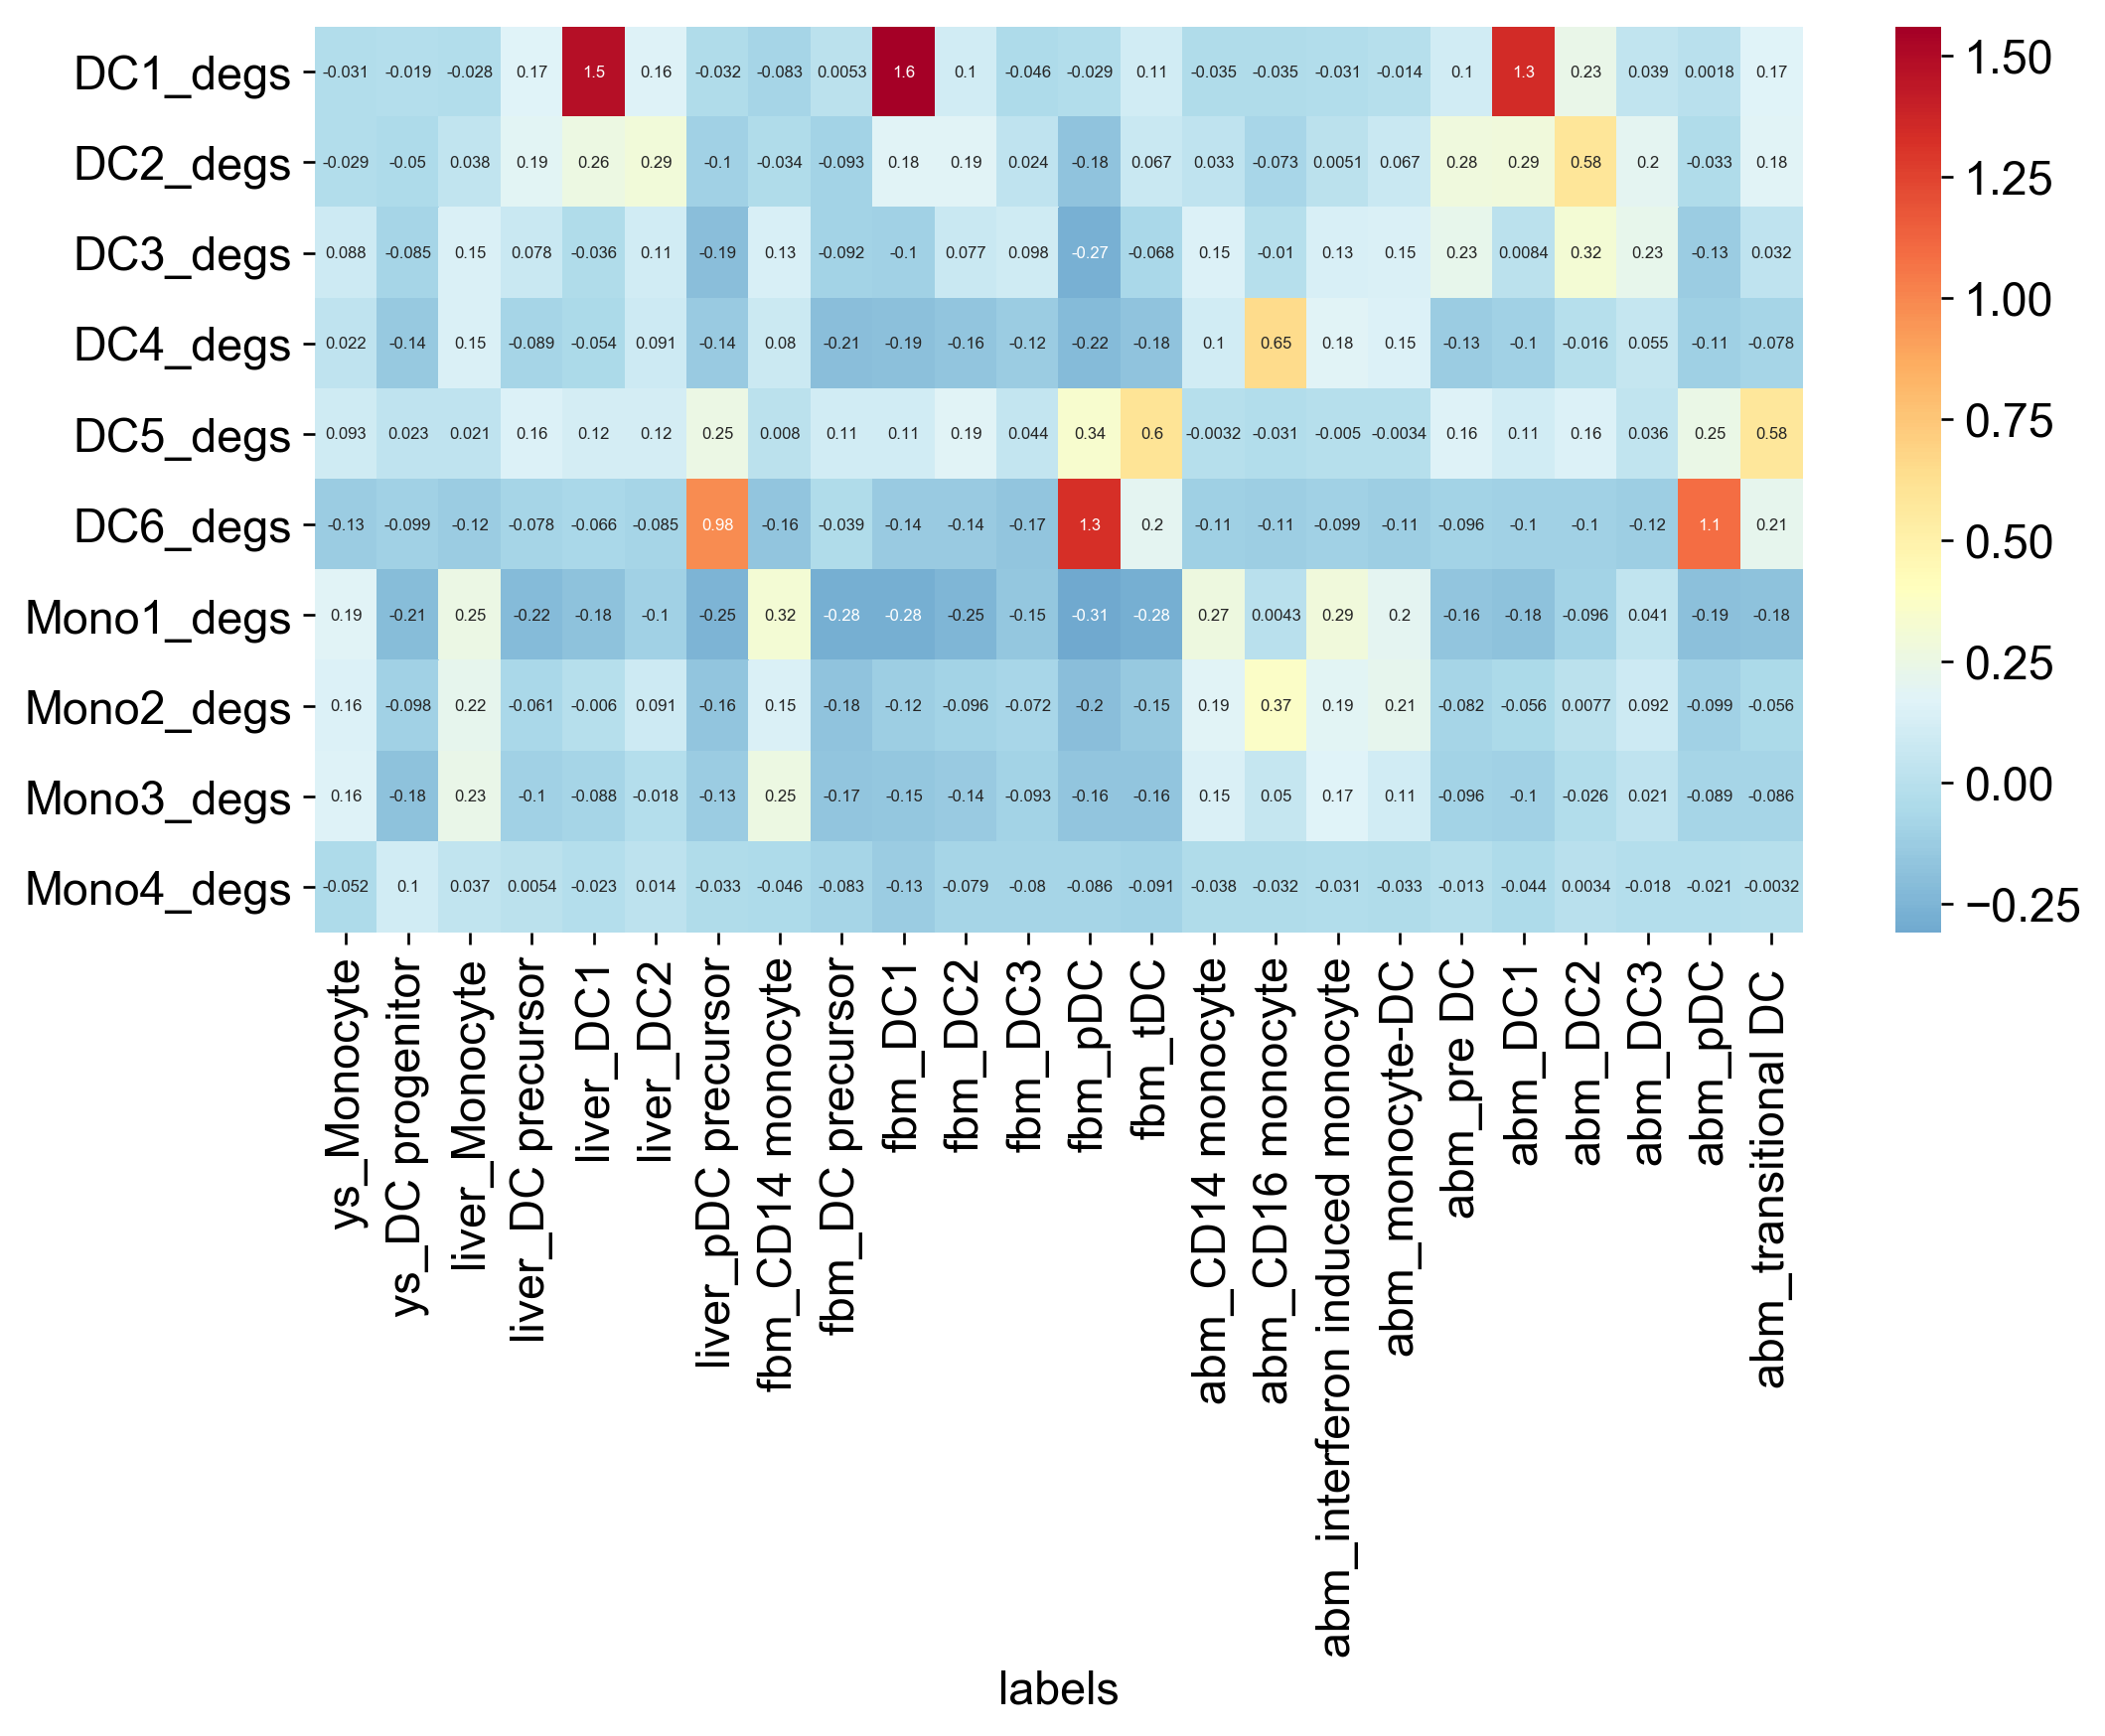

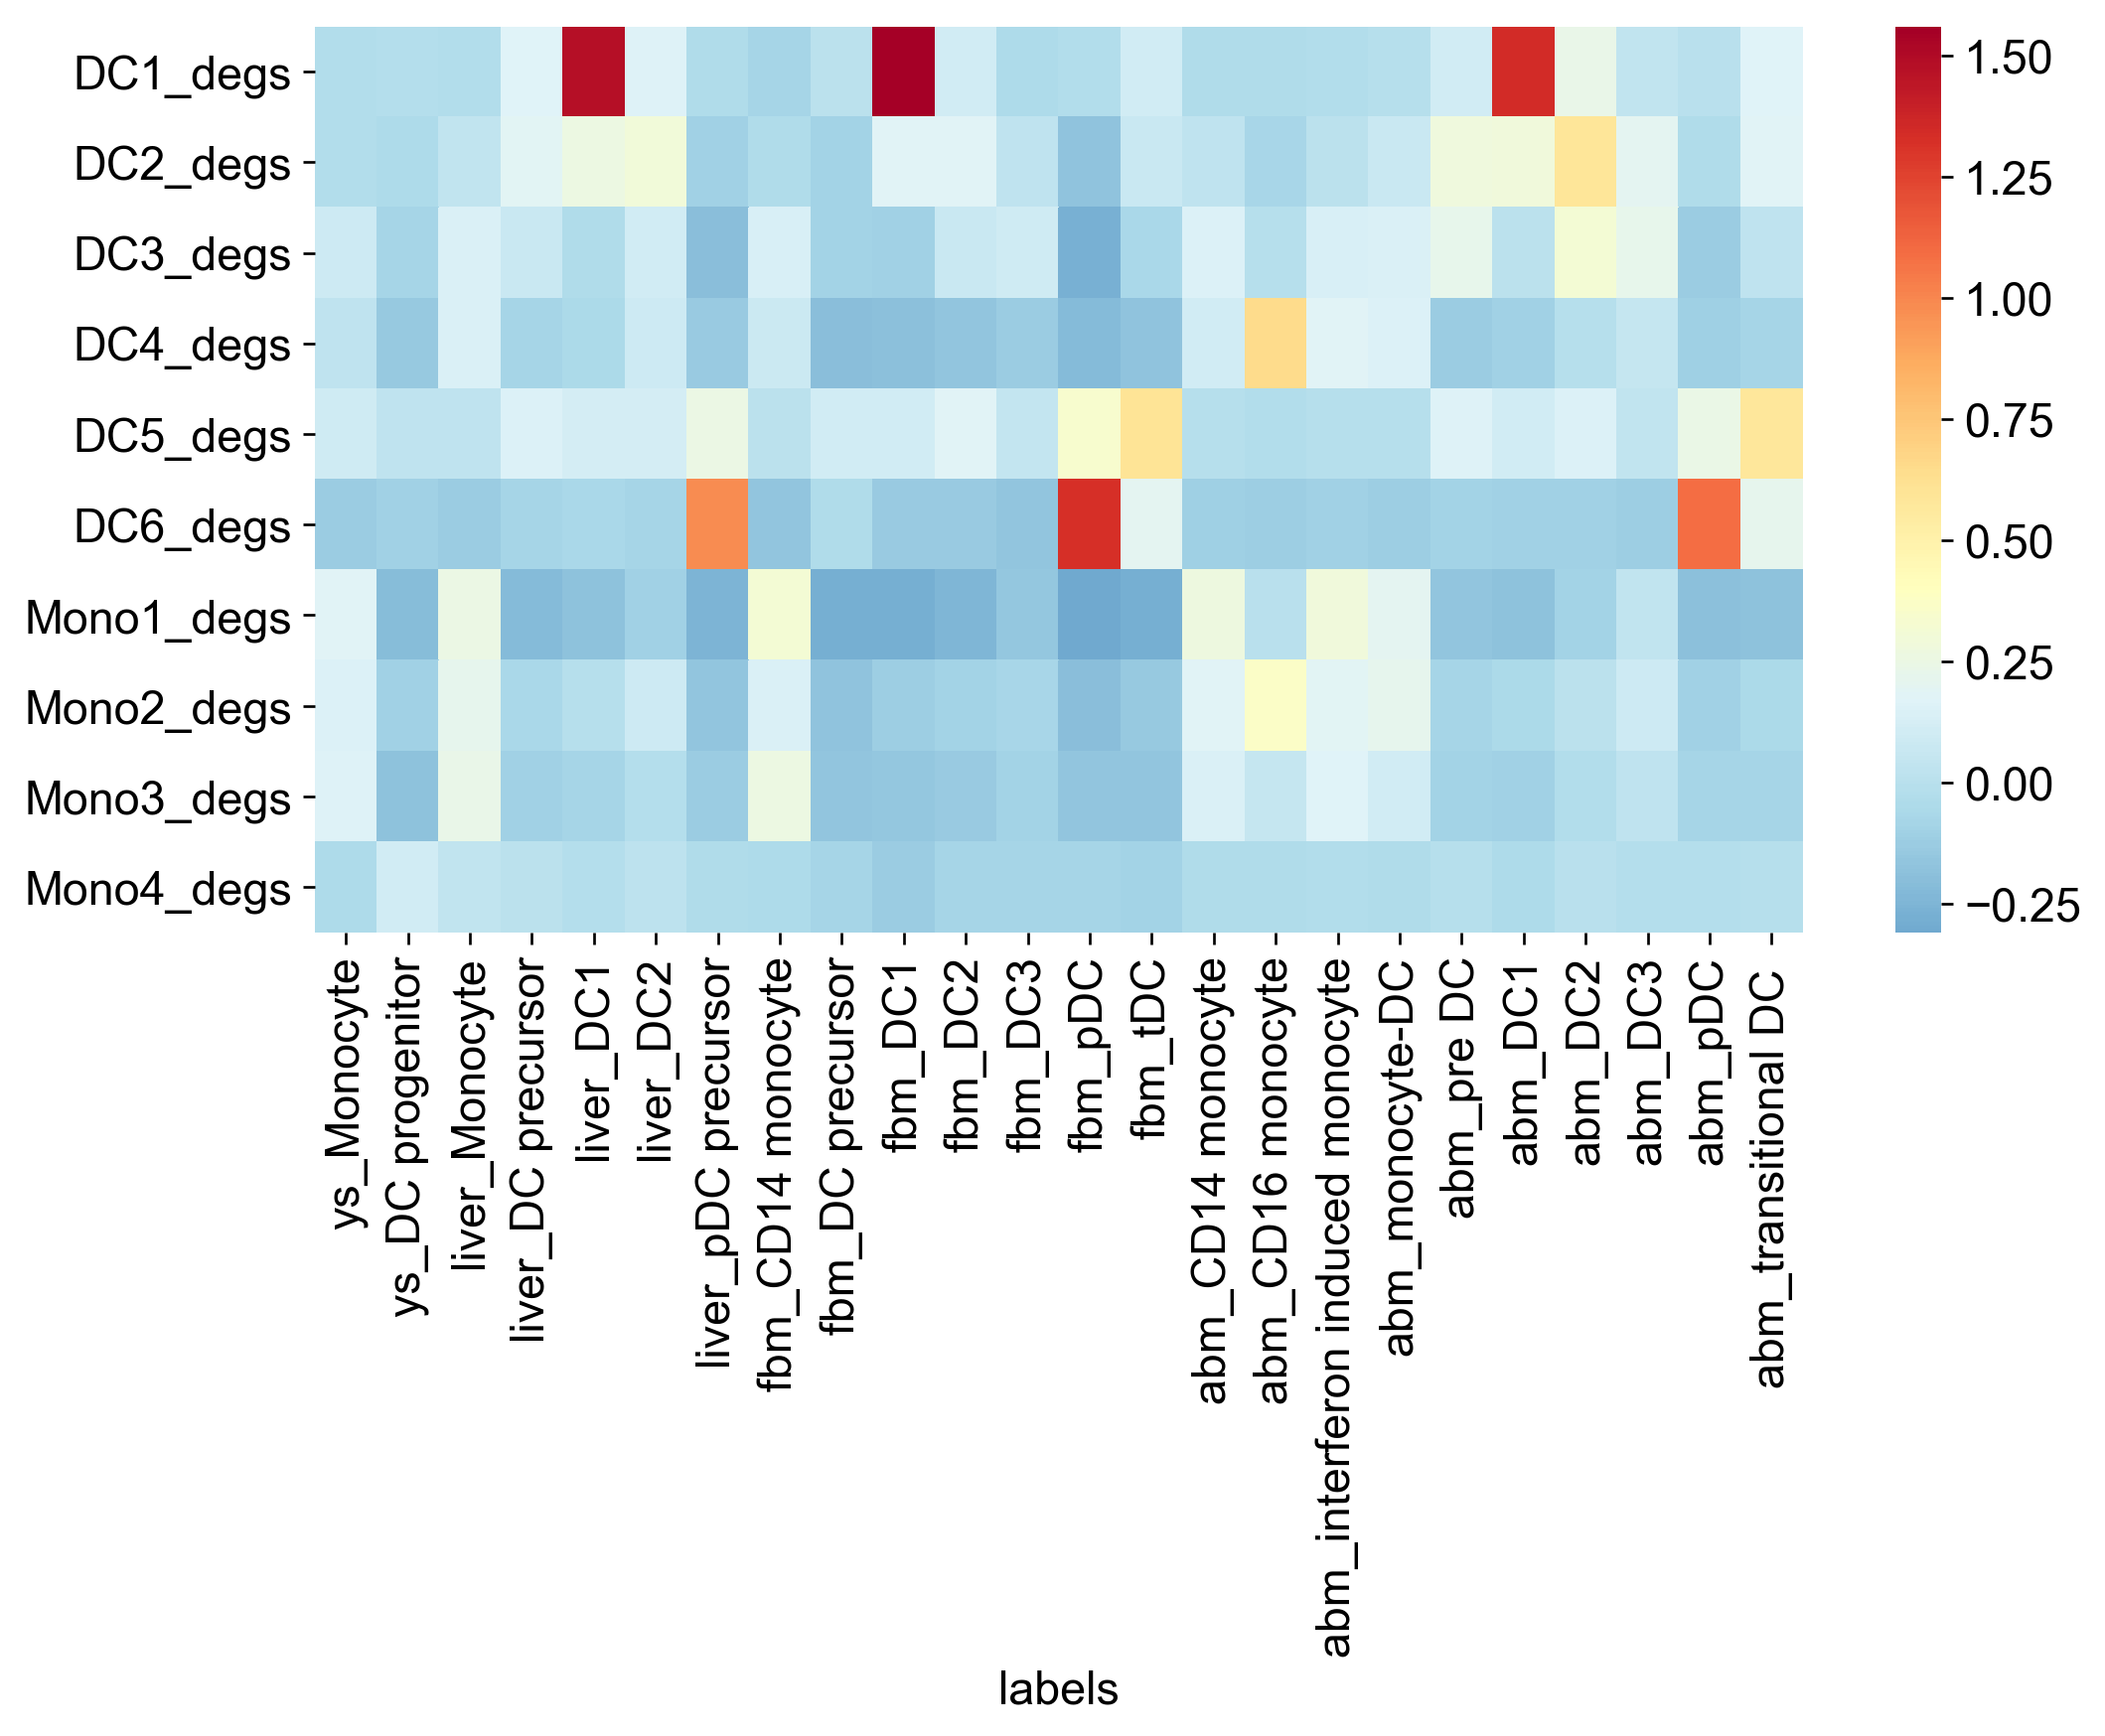

In [72]:
plt.figure(figsize=(10, 5))
fig = sns.heatmap(mean_enrichment_scores_df, annot=True, fmt=".2", center=0.4, annot_kws={"size": 5}, cmap="RdYlBu_r").get_figure() #xticklabels=cell_label_order, yticklabels=cell_label_order,
fig.savefig("figures/figs2h_dc_blood_comparison_numbers_yes_20200514.pdf")
# plot gene scores as a heatmap. 
plt.figure(figsize=(10, 5))
fig = sns.heatmap(mean_enrichment_scores_df, cmap="RdYlBu_r", center=0.4).get_figure() 
fig.savefig("figures/figs2h_dc_blood_comparison_numbers_no_20200514.pdf")

# Save data

In [73]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [74]:
adata.X

<27782x33713 sparse matrix of type '<class 'numpy.float32'>'
	with 51728152 stored elements in Compressed Sparse Row format>

In [75]:
adata.raw.X

<27782x33713 sparse matrix of type '<class 'numpy.float32'>'
	with 57301241 stored elements in Compressed Sparse Row format>

In [76]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/figs2c_dc_20200514.h5ad")

... storing 'AnnatomicalPart' as categorical
... storing 'age' as categorical
... storing 'april_cell.labels' as categorical
... storing 'auto_prd' as categorical
... storing 'backlabeled_1' as categorical
... storing 'cell.labels' as categorical
... storing 'cell.labels2' as categorical
... storing 'combined.labels' as categorical
... storing 'doublets' as categorical
... storing 'ethnicity' as categorical
... storing 'fetal.ids' as categorical
... storing 'full.ids' as categorical
... storing 'gender' as categorical
... storing 'is_doublet' as categorical
... storing 'is_doublet_poptrim' as categorical
... storing 'is_doublet_wolock' as categorical
... storing 'lanes' as categorical
... storing 'leiden' as categorical
... storing 'mad_prd' as categorical
... storing 'orig.ident' as categorical
... storing 'processing.type' as categorical
... storing 'sample' as categorical
... storing 'sample.type' as categorical
... storing 'sequencing.type' as categorical
... storing 'sex' as categ